# Introduction to Machine Learning 4

See https://learning.anaconda.cloud/getting-started-with-ai-ml

Cover major supervised machine learning algorithmss which use labelled data to make predicitons:

- linear regression
- Logistic regression
- Naive Bayes
- Decision trees / random forests
- **Neural networks**

Using `scikit-learn` for implementation

## Neural Networks

Neural networks are multi-layered regressions. 

In this module, you'll learn: 

- The architecture and anatomy of a neural network
- How neural networks are used for classification
- How the regression techniques we've learned relate to neural networks 
- How to predict a category for data

**Neural Networks** are multi-layered regressions that accept numeric inputs and produce numeric outputs via a series of middle layers of multiplicaiton and addition.

Simple example problem predicting a font colour for a background colour..

Input is three RGB values scaled to 0-1,

Output will be a value between 0 and 1 indicating probability of being dark.

Model coefficients are multiplied and added together, and then a non-linear **activation function** is applied to the output of each layer.

![](nn-simple.png)

Finding the optimal number of layers and nodes, as well as the choice of activation functions usually requires experiment.
Finding the right weight and bias values is founds through optimisation techniques like **stochastic gradient descent** #FurtherLearning



### Activation functions 

Common neural network activation functions implemented in Python:

#### RELU

![](2023-10-11-17-01-34.png)

```python
import numpy as np
from scipy import special
import math

def relu(x):
    return np.maximum(x, 0)
```

#### SIGMOID

![](2023-10-11-17-01-59.png)


```python
import numpy as np
from scipy import special
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))
```

#### TANH

![](2023-10-11-17-00-50.png)

```python
import numpy as np
from scipy import special
import math

def tanh(x):
    return np.tanh(x)
```
#### SOFTMAX

![](2023-10-11-17-03-07.png)

```python
import numpy as np
from scipy import special
import math

def softmax(x):
    return special.softmax(x, axis=0)
```

### Example of using Neural Network in `scikit-learn`

Note, in real applications might use something like pytorch or tensorflow.

In this example we use class [`sklearn.neural_network.MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('https://bit.ly/3GsNzGt', delimiter=",")
df

,RED,GREEN,BLUE,LIGHT_OR_DARK_FONT_IND
0,0,0,0,0
1,0,0,128,0
2,0,0,139,0
3,0,0,205,0
4,0,0,238,0
...,...,...,...,...
1340,95,158,160,1
1341,96,123,139,0
1342,97,97,97,0
1343,99,184,255,1


In [3]:
# Extract input variables (all rows, all columns but last column)
# Note we should do some linear scaling here
X = (df.values[:, :-1] / 255.0)

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=7)

In [10]:
# Fit a neural network (multi-layer perceptron) classifier with
# a middle ReLU function, 
# 3 nodes in a hidden layer, 
# 100000 iterations, 
# and a .05 learning rate. 
# 
# Fit the training data to the model.

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(3,), learning_rate_init=0.05, max_iter=100000,
              solver='sgd')

In [11]:
# Print weights and biases
print(nn.coefs_ )
print(nn.intercepts_)

print("Test set score: %f" % nn.score(X_test, Y_test))

cf = confusion_matrix(y_true=Y_test, y_pred=nn.predict(X_test))
print(cf)

[array([[-2.5288264 ,  0.54384869,  2.66208363],
       [-6.0300435 , -0.53061415,  3.41350459],
       [-1.19692915,  0.67221504,  0.46662982]]), array([[-8.77052254],
       [ 1.02725553],
       [ 4.40563509]])]
[array([ 5.79510516, -1.15796798, -1.50723181]), array([0.45564864])]
Test set score: 0.995546
[[176   2]
 [  0 271]]


### Another example

In [12]:
import pandas as pd
# load data
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv('https://bit.ly/3wlFsb4')



In [16]:
# Extract input variables (all rows, all columns but last column)
# Note we should do some linear scaling here
X = df.values[:, :-1] / 1000.0

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1.0/3.0, random_state=7)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.01)

nn.fit(X_train, Y_train)

# Print weights and biases
print(nn.coefs_ )
print(nn.intercepts_)

print("Test set score: %f" % nn.score(X_test, Y_test))

print("Confusion Matrix:")
cf = confusion_matrix(y_true=Y_test, y_pred=nn.predict(X_test))
print(cf)

[array([[ 0.62259323,  0.79266761, -0.35036214],
       [ 0.63978951, -0.31861202,  1.57200507],
       [-0.28939024,  0.56924099, -0.550873  ]]), array([[0.8701925 ],
       [0.11968586],
       [1.66458086]])]
[array([-0.32014153, -0.02331887, -0.63071361]), array([-1.62660653])]
Test set score: 0.817568
Confusion Matrix:
[[77  9]
 [18 44]]


### Neural networks / Computer Vision / MNIST database

This example looks at the MNIST database of hand-written digits.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [3]:
# Read MNIST handwritten digits data from Pandas. 
# Note the data is somewhat large so it is stored as a zipped CSV.

df = pd.read_csv('https://bit.ly/3ilJc2C', compression='zip', delimiter=",")
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [7]:
# Separate the input and output variables.
X = df.values[:, :-1] / 255.0
Y = df.values[:, -1]

Print out the number of instances of each class. Stratify so that each class is sampled equally.

In [8]:
# Get a count of each group to ensure samples are equitably balanced
print(df.groupby(["class"]).agg({"class" : [np.size]}))

# Separate training and testing data
# Note that I use the 'stratify' parameter to ensure
# each class is proportionally represented in both sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=.33, random_state=10, stratify=Y)

      class
       size
class      
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958


Train a neural network using the logistic function as the hidden layer activation function with 100 nodes. Set a higher learning rate of .01.

In [9]:
nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(100, ),
                   activation='logistic',
                   max_iter=480,
                   learning_rate_init=.1)

nn.fit(X_train, Y_train)

print("Test set score: %f" % nn.score(X_test, Y_test))

cf = confusion_matrix(y_true=Y_test, y_pred=nn.predict(X_test))
print(cf)

Test set score: 0.977965
[[2245    0    2    3    1    7    9    0    6    5]
 [   0 2570    6    9    1    2    3    4    1    3]
 [   2    6 2258   10    3    3    2   10    9    4]
 [   3    2   17 2283    1   27    2   10    8    4]
 [   5    3    8    1 2184    1    8    7    1   34]
 [   5    0    2   23    3 2027    8    2    6    7]
 [  11    4    1    0    5   10 2232    0    6    0]
 [   4    6    7    4    3    1    0 2367    5   10]
 [   7   11    6   13    5   10    5    3 2184    8]
 [   5    1    1   11   16    4    2   10    5 2241]]


Display heat map for each digit character weights.

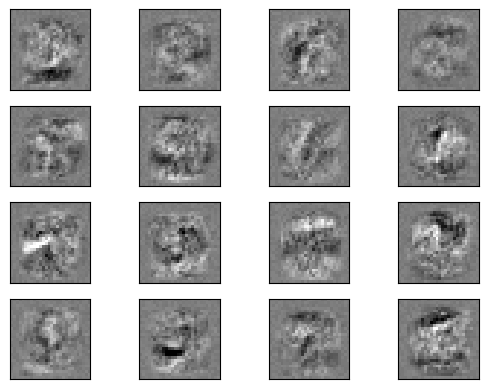

In [10]:
# Display heat map
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4)

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn.coefs_[0].min(), nn.coefs_[0].max()
for coef, ax in zip(nn.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())